## P1 i

<img src="p1a.jpg" alt="descripción_de_la_imagen">

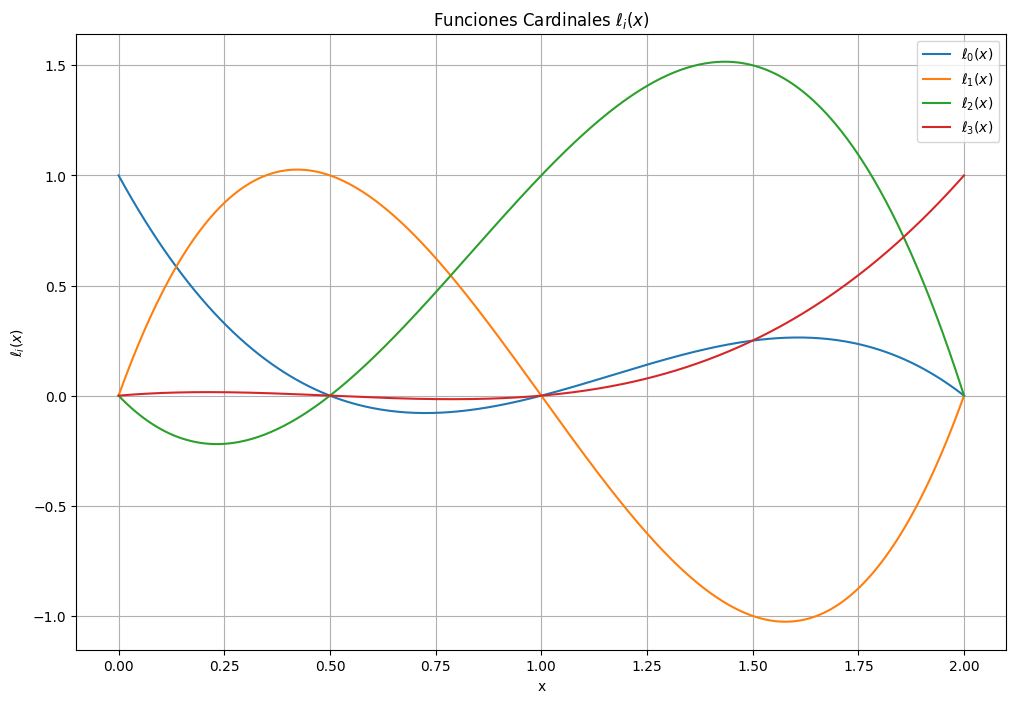

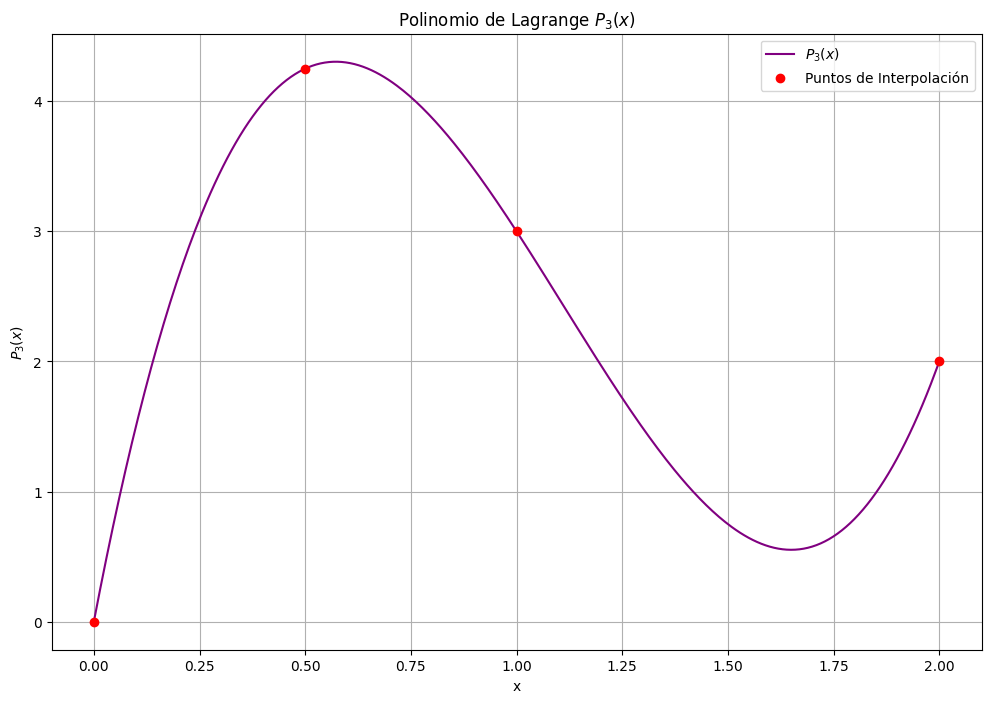

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Puntos de interpolación dados
x = [0, 0.5, 1, 2]
y = [0, 4.25, 3, 2]

# Interpolación usando Lagrange
polinomio_lagrange = lagrange(x, y)

# Funciones cardinales (calculadas manualmente)
def l_0(x): return (x - 0.5)*(x - 1)*(x - 2) / ((0 - 0.5)*(0 - 1)*(0 - 2))
def l_1(x): return (x - 0)*(x - 1)*(x - 2) / ((0.5 - 0)*(0.5 - 1)*(0.5 - 2))
def l_2(x): return (x - 0)*(x - 0.5)*(x - 2) / ((1 - 0)*(1 - 0.5)*(1 - 2))
def l_3(x): return (x - 0)*(x - 0.5)*(x - 1) / ((2 - 0)*(2 - 0.5)*(2 - 1))

# Rango de valores para graficar
x_vals = np.linspace(0, 2, 400)

# Evaluación de funciones
l0_vals = l_0(x_vals)
l1_vals = l_1(x_vals)
l2_vals = l_2(x_vals)
l3_vals = l_3(x_vals)
P3_vals = polinomio_lagrange(x_vals)

# Graficar las funciones cardinales
plt.figure(figsize=(12, 8))
plt.plot(x_vals, l0_vals, label=r'$\ell_0(x)$')
plt.plot(x_vals, l1_vals, label=r'$\ell_1(x)$')
plt.plot(x_vals, l2_vals, label=r'$\ell_2(x)$')
plt.plot(x_vals, l3_vals, label=r'$\ell_3(x)$')
plt.title('Funciones Cardinales $\ell_i(x)$')
plt.xlabel('x')
plt.ylabel(r'$\ell_i(x)$')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el polinomio de Lagrange
plt.figure(figsize=(12, 8))
plt.plot(x_vals, P3_vals, label=r'$P_3(x)$', color='purple')
plt.scatter(x, y, color='red', zorder=5, label='Puntos de Interpolación')
plt.title(r'Polinomio de Lagrange $P_3(x)$')
plt.xlabel('x')
plt.ylabel(r'$P_3(x)$')
plt.legend()
plt.grid(True)
plt.show()
